In [11]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report

import lightgbm as lgb

In [12]:
data_folder =  'csv_data/archive/'
suffix = '_old'

df_public_old = pd.read_csv(data_folder + 'df_public_test' + suffix +'.csv', index_col='Unnamed: 0')
df_private_old = pd.read_csv(data_folder + 'df_private_test' + suffix +'.csv', index_col='Unnamed: 0')
df_ER_old = pd.read_csv(data_folder + 'df_ER' + suffix +'.csv', index_col='Unnamed: 0')
df_NR_old = pd.read_csv(data_folder + 'df_NR' + suffix +'.csv', index_col='Unnamed: 0')

data_folder =  'csv_data/'
suffix = ''

df_public = pd.read_csv(data_folder + 'df_public_test' + suffix +'.csv', index_col='Unnamed: 0')
df_private = pd.read_csv(data_folder + 'df_private_test' + suffix +'.csv', index_col='Unnamed: 0')
df_ER = pd.read_csv(data_folder + 'df_ER' + suffix +'.csv', index_col='Unnamed: 0')
df_NR = pd.read_csv(data_folder + 'df_NR' + suffix +'.csv', index_col='Unnamed: 0')

df = pd.concat([df_NR, df_ER])

In [13]:
feat_list = [df_ER.columns[i] for i in range(len(df_ER.columns)) if df_ER.columns[i][-11:-1] != 'bkgr_only_']
feat_list_bkgr = [df_ER.columns[i] for i in range(len(df_ER.columns)) if df_ER.columns[i][-11:-1] == 'bkgr_only_']

In [14]:
# X_ER = df.query('sig_count_y > 100 and event_energy<30 and event_class == "ER"').sig_count_y.values.reshape(-1, 1)
# y_ER = df.query('sig_count_y > 100 and event_energy<30 and event_class == "ER"').event_energy.values.reshape(-1, 1)
X_ER = df.query('sig_count_y > 100 and event_energy>1 and event_energy<20 and event_class == "ER"').sig_count_y.values.reshape(-1, 1)
y_ER = df.query('sig_count_y > 100 and event_energy>1 and event_energy<20 and event_class == "ER"').event_energy.values.reshape(-1, 1)
idx = [i for i in range(len(X_ER)) if (X_ER[i]< 2000 or y_ER[i] != 1)]
X_ER = [X_ER[i][0] for i in idx]
y_ER = [y_ER[i][0] for i in idx]
a_ER, b_ER = np.polyfit(y_ER, X_ER, deg=1)

X_NR = df.query('event_energy>3 and event_energy<30 and event_class == "NR"').sig_count_y.values.reshape(-1, 1)
y_NR = df.query('event_energy>3 and event_energy<30 and event_class == "NR"').event_energy.values.reshape(-1, 1)
idx = [i for i in range(len(X_NR))]
X_NR = [X_NR[i][0] for i in idx]
y_NR = [y_NR[i][0] for i in idx]
a_NR, b_NR = np.polyfit(y_NR, X_NR, deg=1)

In [15]:
a_NR

568.8001861354272

In [16]:
b_NR

-856.1644924846706

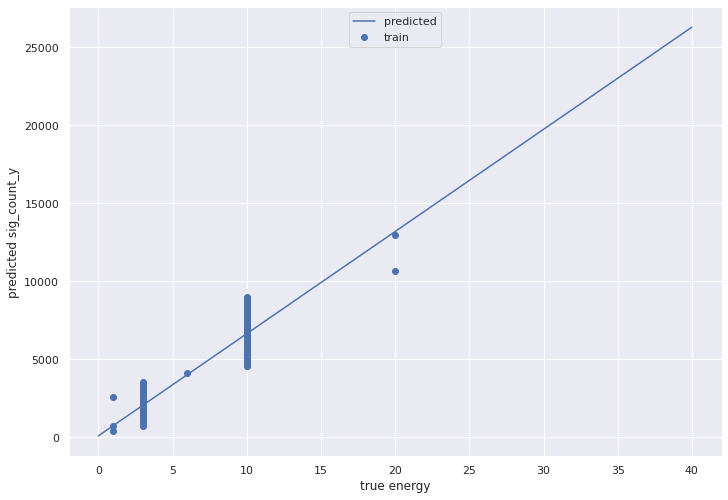

In [17]:
X_ER = df.query('sig_count_y > 100 and event_energy<30 and event_class == "ER"').sig_count_y.values.reshape(-1, 1)
y_ER = df.query('sig_count_y > 100 and event_energy<30 and event_class == "ER"').event_energy.values.reshape(-1, 1)
energies = np.unique(y_NR)

xmin, xmax = 0, 40
plt.scatter(y_ER, X_ER, label='train')
plt.plot([0, 40], a_ER*np.array([0, 40])+b_ER, label='predicted')
# plt.scatter(30*np.ones_like(E_pred_30_synth), E_pred_30_synth, label='synthetic')
# plt.plot([xmin,xmax], [xmin,xmax])
plt.xlabel('true energy')
plt.ylabel('predicted sig_count_y')
plt.legend(loc='upper center')
plt.show()

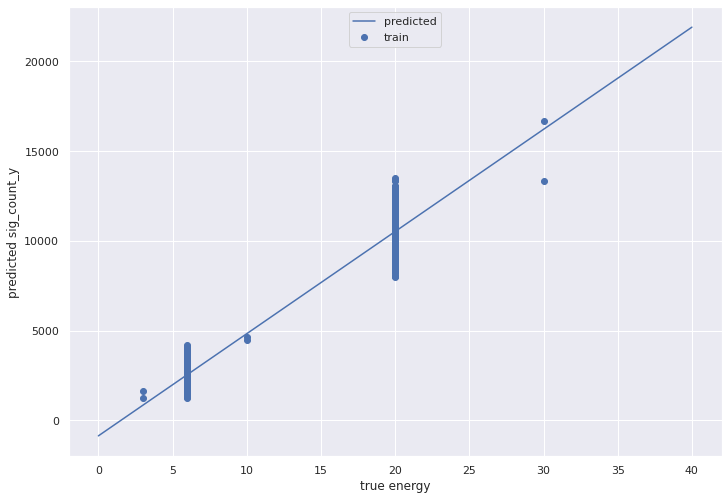

In [18]:
X_NR = df.query('event_energy>1 and event_class == "NR"').sig_count_y.values.reshape(-1, 1)
y_NR = df.query('event_energy>1 and event_class == "NR"').event_energy.values.reshape(-1, 1)
energies = np.unique(y_NR)

xmin, xmax = 0, 40
plt.scatter(y_NR, X_NR, label='train')
plt.plot([0, 40], a_NR*np.array([0, 40])+b_NR, label='predicted')
# plt.scatter(30*np.ones_like(E_pred_30_synth), E_pred_30_synth, label='synthetic')
# plt.plot([xmin,xmax], [xmin,xmax])
plt.xlabel('true energy')
plt.ylabel('predicted sig_count_y')
plt.legend(loc='upper center')
plt.show()

In [19]:
a_ER*1 + b_ER

731.2651522098898

In [20]:
a_NR*1 + b_NR

-287.3643063492434

In [21]:
(a_ER*1 + b_ER + a_NR*1 + b_NR) / 2

221.9504229303232

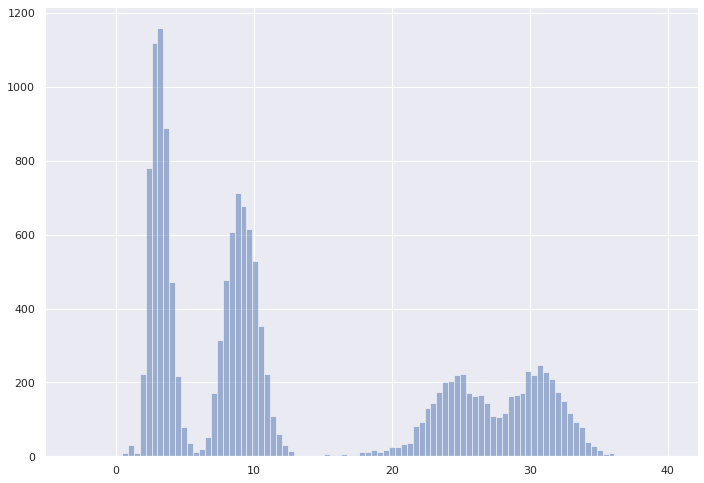

In [50]:
a = plt.hist((df_private['sig_count_y'].values - b_NR)/a_NR, bins=100, range=(-3, 40), alpha=0.5, label='private')
plt.show()

In [75]:
e = np.array([0.5*(a[1][i]+a[1][i+1]) for i in range(len(a[1])-1)])

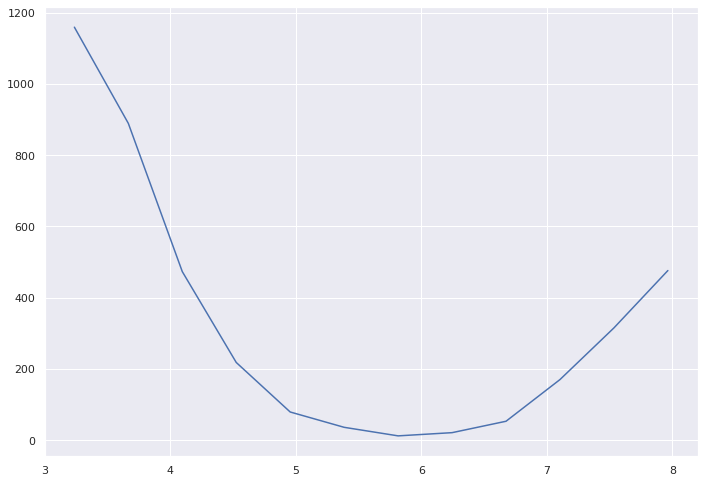

In [83]:
idx = [i for i in range(len(e)) if e[i] > 3 and e[i] < 8]
e_from_3_to_8 = e[idx]
plt.plot(e_from_3_to_8, a[0][idx])

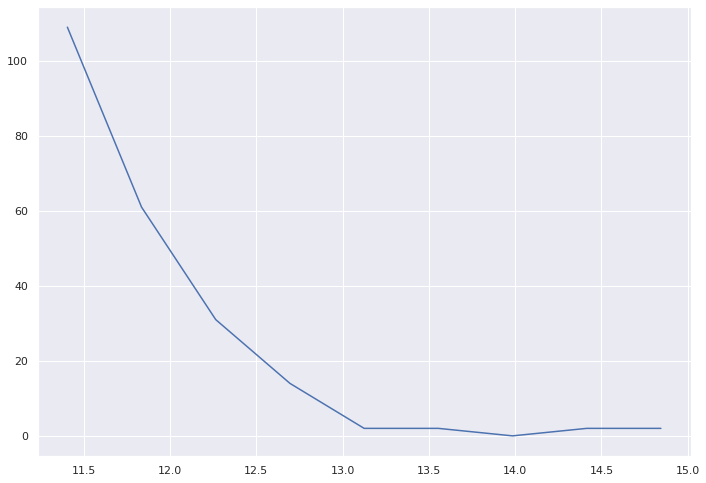

In [84]:
idx = [i for i in range(len(e)) if e[i] > 11 and e[i] < 15]
e_from_11_to_15 = e[idx]
plt.plot(e_from_11_to_15, a[0][idx])

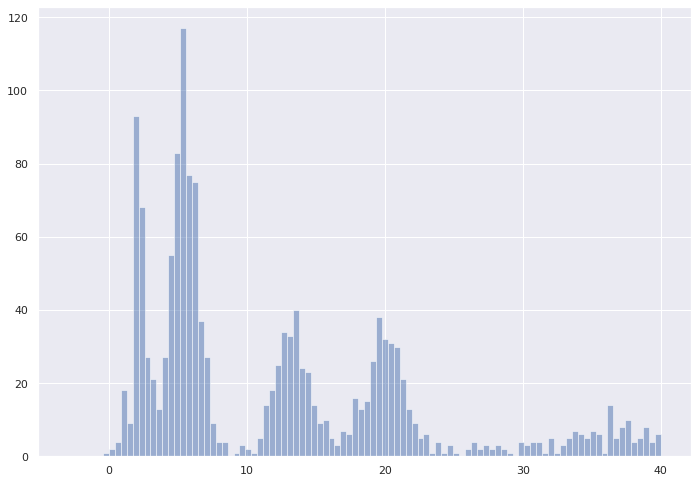

In [96]:
a = plt.hist((df_public['sig_count_y'].values - b_NR)/a_NR, bins=100, range=(-3, 40), alpha=0.5, label='public')
plt.show()

In [91]:
a = (df_private['sig_count_y'].values - b_NR)/a_NR > 6 

In [92]:
b = (df_private['sig_count_y'].values - b_NR)/a_NR < 14

In [93]:
sum(a * b)

4972

In [94]:
sum((df_private['sig_count_y'].values - b_NR)/a_NR <= 6 )

5066

In [95]:
sum((df_private['sig_count_y'].values - b_NR)/a_NR >=14 )

5020

In [90]:
len(df_private)

15058

In [40]:
a = (df_private['sig_count_y'].values - b_NR)/a_NR > 5 
b = (df_private['sig_count_y'].values - b_NR)/a_NR < 11
sum(a * b)

4729

(array([3494., 3037., 1924.,   25.,   69.,  445., 1479., 1087., 1568.,
         341.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

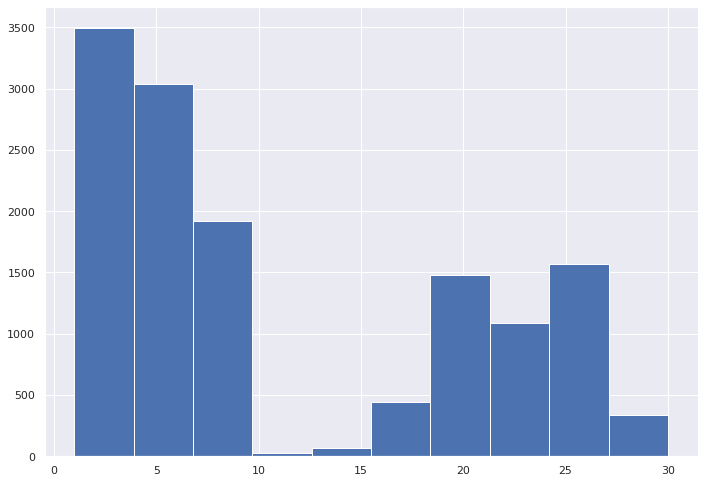

In [28]:
plt.hist((df_private['sig_count_y'].values - b_ER)/a_ER, range=(1,30))

(array([4.0000e+00, 1.5046e+04, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-75685.01788453, -18103.85502787,  39477.30782879,  97058.47068546,
        154639.63354212, 212220.79639878, 269801.95925544, 327383.1221121 ,
        384964.28496876, 442545.44782543, 500126.61068209]),
 <BarContainer object of 10 artists>)

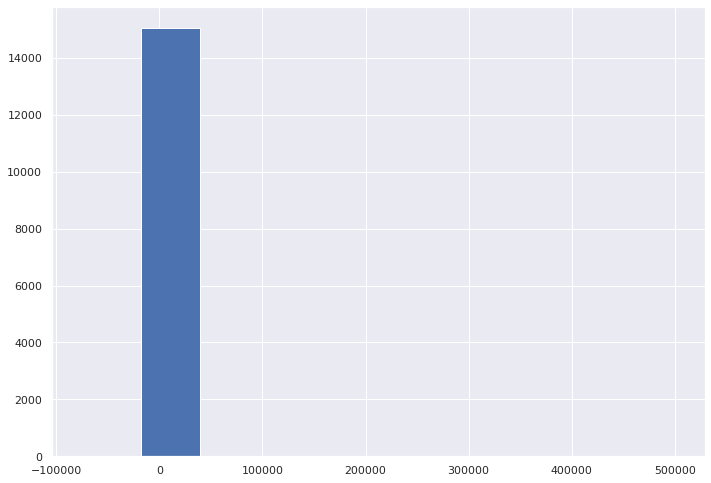

In [23]:
plt.hist(df_private['sig_count_y'])

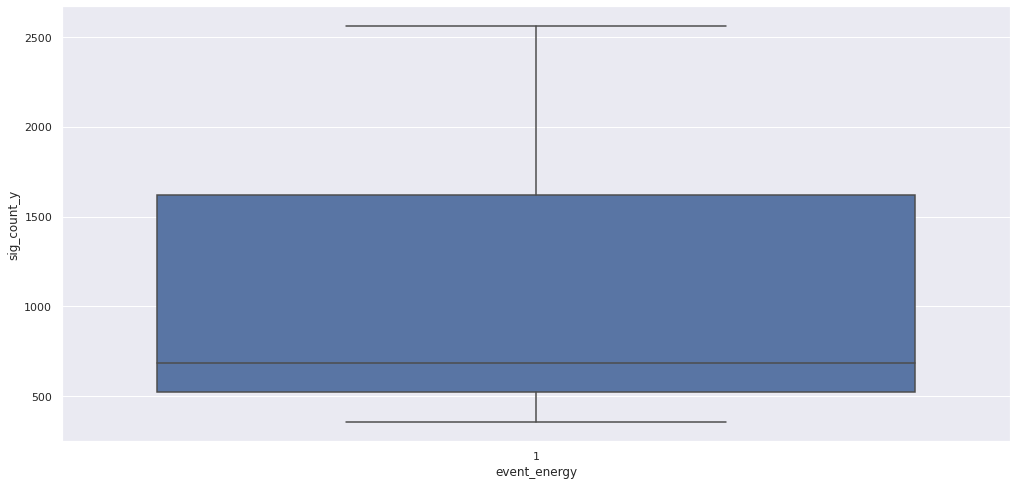

In [24]:
f, ax = plt.subplots(1, 1, figsize=(17,8))
#ax.set_ylim(0, 50000)
#ax.set_title(f'{proj} projection')
cut = 'sig_count_y > 100 and event_energy==1 and event_class == "ER"'
g = sns.boxplot(x='event_energy', y=f'sig_count_y', data=df.query(cut), ax=ax)
#sns.lineplot(x=[0, 40], y=a_ER*np.array([0, 40])+b_ER)

In [69]:
from utils import *

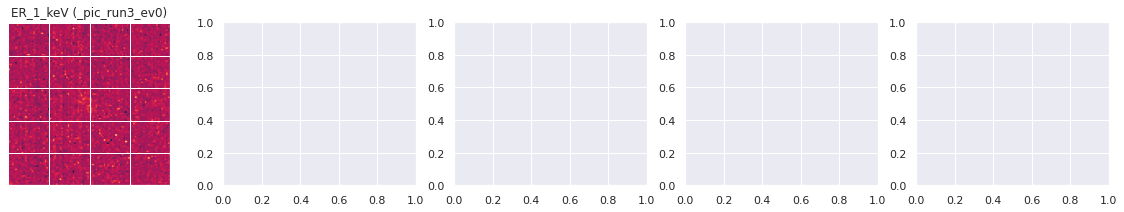

In [75]:
t = plot_images('../../idao_dataset/', im_filename=strange)

In [13]:
# check if old and new df_ER are equal
cmp = df_ER[feat_list] != df_ER_old[feat_list]
print(sum(sum(cmp.values)))

# check if old and new df_NR are equal (sorting required)
idx = df_NR.index
df_NR.sort_values('image_name', inplace=True)
df_NR.index = idx

idx = df_NR_old.index
df_NR_old.sort_values('image_name', inplace=True)
df_NR_old.index = idx

cmp = df_NR[feat_list].sort_values('image_name') != df_NR_old[feat_list].sort_values('image_name')
print(sum(sum(cmp.values)))

# check if old and new df_public are equal (sorting required)
idx = df_public.index
df_public.sort_values('image_name', inplace=True)
df_public.index = idx

idx = df_public_old.index
df_public_old.sort_values('image_name', inplace=True)
df_public_old.index = idx

cmp = df_public[feat_list].sort_values('image_name') != df_public_old[feat_list].sort_values('image_name')
print(sum(cmp.values))

0
0
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 1502 1502 1502 1502    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
